In [16]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np

%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)

Populating the interactive namespace from numpy and matplotlib


In [17]:
def aggregate(df):
    return df.groupby(0)[df.columns[1:54]].min()

In [18]:
out_dir = '../papi_output/'
path = out_dir + 'o1p.csv'

df = pd.read_csv(path, header=None)
df = aggregate(df)
df = df.sample(frac=1) # shuffle for better cross-validation

In [19]:
x = df.iloc[:,0:52].as_matrix()
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
y = df.iloc[:,52].as_matrix()

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
pca = PCA(n_components=6)
pca.fit(x)
x2 = pca.transform(x)

In [21]:
svr = SVR(kernel='linear')
svr.fit(x2, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
scores = cross_val_score(svr, x2, y, cv=3)
scores.mean()

0.087481312290271077

In [23]:
pca.explained_variance_ratio_.sum()

0.93590440624417026

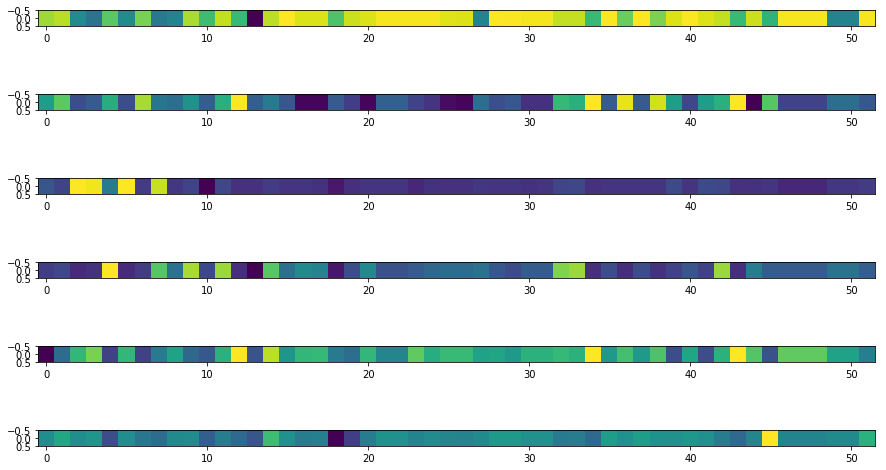

In [24]:
# just to visualize which of 52 PAPI output events are most significant (marked in yellow)

fig, axs = plt.subplots(nrows=6)
for i, ax in enumerate(axs): 
    ax.imshow(pca.components_[i:i+1])
plt.show()

In [25]:
df

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
0,,,,,,,,,,,,,,,,,,,,,
18,2457,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.996
3,10764,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.994
21,302,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.840
11,41060,41,49,0,0,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.741
0,21114,23,312,0,9706968,312,41,110,0,34152,...,29313,0,0,0,0,0,0,0,0,56.051
16,4256,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.534
7,827,22,52,0,1607898,52,157,0,0,2257,...,2350,0,0,0,0,0,0,0,0,61.347
27,9031,31,12923,2,2601206,12926,11,138,0,0,...,0,0,0,0,0,0,0,0,0,24.852
6,378,23,330,0,1428420,330,290,0,0,5522,...,0,0,0,0,0,0,0,0,0,678.994
